In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import kneed
import plotly.express as px

In [179]:
data = pd.read_csv("../data/raw_data/LoanData_(DS_Home_Task).csv", sep = ";")

/var/folders/c0/ys9pkt156rd6jxylz86_1flh0000gn/T/ipykernel_61619/3743429776.py:1: DtypeWarning: Columns (12,34,38,80,82,83,89,90) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../data/raw_data/LoanData_(DS_Home_Task).csv", sep = ";")


In [110]:
data_no_dates_cats = data.drop(["LoanDate", "LoanId",
                                "LoanApplicationStartedDate", "DefaultDate",
                                "ReportAsOfEOD","PartyId", "ListedOnUTC",
                                "FirstPaymentDate","MaturityDate_Original",
                                "BiddingStartedOn","ContractEndDate","MaturityDate_Last"], axis=1)
data_no_dates_cats.head()


,LoanNumber,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,...,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
0,3015853,11,0.0,88.0,False,12,6,4.0,1,27,...,0.0,NaN,NaN,2023-11-27,1.0,24.0,2023-10-10,NaN,NaN,NaN
1,3743447,0,0.0,0.0,False,23,4,4.0,4,35,...,0.0,NaN,NaN,2023-10-26,4.0,120.0,2023-07-20,NaN,NaN,NaN
2,483449,970,1150.0,5.0,False,17,4,4.0,1,53,...,0.0,2019-10-28,2020-01-27,NaN,NaN,NaN,NaN,0.0,82.76,121-150
3,4043783,0,0.0,0.0,False,15,3,4.0,4,43,...,0.0,NaN,NaN,2023-11-06,2.0,108.0,2023-09-26,NaN,NaN,NaN
4,2819530,16,0.0,0.0,False,18,5,4.0,1,25,...,0.0,NaN,NaN,2023-11-09,18.0,60.0,NaN,NaN,NaN,NaN


In [111]:
numeric_columns = data.select_dtypes(include=["int64", "float64"]).columns
object_columns = data.select_dtypes(include=["object"]).columns
numeric_data = data[numeric_columns]
numeric_data.describe()

,LoanNumber,BidsPortfolioManager,BidsApi,BidsManual,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,DateOfBirth,...,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,NextPaymentNr,NrOfScheduledPayments,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost
count,3.327110e+05,332711.000000,332711.000000,332711.000000,332711.000000,332711.000000,332661.000000,332711.000000,332711.000000,0.0,...,174039.000000,332699.000000,332699.000000,204771.000000,61047.000000,332699.000000,181124.000000,181124.000000,105553.000000,105553.000000
mean,2.108768e+06,457.819002,16.015729,292.781333,13.375037,3.966466,3.456825,3.127573,40.364566,NaN,...,939.228845,1.706624,3642.566878,1164.050973,468.493719,0.045149,4.722682,72.519401,14.962669,271.702870
std,1.122177e+06,983.351575,109.461881,588.501612,4.988839,1.795607,1.125572,2.478402,12.222299,NaN,...,2966.014297,2.743377,5519.059035,1933.423430,1835.955039,0.291669,7.879991,32.939835,98.158797,474.067319
min,3.700000e+01,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,NaN,...,-2.660000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.045069e+06,6.000000,0.000000,5.000000,10.000000,2.000000,4.000000,1.000000,31.000000,NaN,...,0.000000,0.000000,0.000000,123.995000,0.000000,0.000000,0.000000,56.000000,0.000000,0.000000
50%,2.226020e+06,101.000000,0.000000,63.000000,13.000000,4.000000,4.000000,4.000000,39.000000,NaN,...,0.000000,1.000000,932.000000,480.140000,0.000000,0.000000,2.000000,60.000000,0.000000,69.700000
75%,2.965361e+06,400.000000,2.000000,302.000000,17.000000,5.000000,4.000000,4.000000,49.000000,NaN,...,523.750000,2.000000,5315.000000,1264.015000,0.000000,0.000000,5.000000,114.000000,0.000000,330.590000
max,4.082274e+06,10625.000000,7570.000000,10631.000000,23.000000,7.000000,4.000000,22.000000,77.000000,NaN,...,78982.070000,74.000000,119983.000000,34077.420000,48100.000000,13.000000,60.000000,141.000000,3325.330000,7064.970000


In [112]:
data_objects_data = data[object_columns]
data_objects_data.head()


,ReportAsOfEOD,LoanId,ListedOnUTC,BiddingStartedOn,PartyId,LoanApplicationStartedDate,LoanDate,ContractEndDate,FirstPaymentDate,MaturityDate_Original,...,ActiveLateCategory,WorseLateCategory,CreditScoreEsMicroL,CreditScoreEsEquifaxRisk,CreditScoreFiAsiakasTietoRiskGrade,GracePeriodStart,GracePeriodEnd,NextPaymentDate,ReScheduledOn,ActiveLateLastPaymentCategory
0,2023-10-15,D8EBF360-104C-420F-BEC9-000924E6EFC7,2022-09-09 12:27:01,2022-09-09 15:27:01,{1AD71AF0-8240-4700-B602-ADA90177DD8C},2022-09-09 15:15:03,2022-09-09,2025-10-27,2022-10-07,2027-09-07,...,NaN,1-7,M,NaN,NaN,NaN,NaN,2023-11-27,2023-10-10,NaN
1,2023-10-15,C1A98DDA-5E20-429C-BBFF-0009A05354E0,2023-05-19 11:04:33,2023-05-19 14:04:33,{3A9CF70B-0BD2-4ECE-8997-AF7F00D0EC5A},2023-05-19 14:03:54,2023-05-19,2033-06-27,2023-06-05,2028-05-03,...,NaN,NaN,M,NaN,3,NaN,NaN,2023-10-26,2023-07-20,NaN
2,2023-10-15,66AE108B-532B-4BB3-BAB7-0019A46412C1,2016-03-23 16:07:19,2016-03-23 16:07:19,{EBF05573-554D-4A3B-BC77-A2CF00B7D110},2016-03-17 12:39:22,2016-03-23,2023-05-31,2016-05-12,2021-04-12,...,180,180,NaN,NaN,NaN,2019-10-28,2020-01-27,NaN,NaN,121-150
3,2023-10-15,C7EA512A-465D-4043-A9F2-001B14C3C14E,2023-09-26 12:14:12,2023-09-26 15:14:12,{7ACD344F-2823-47D4-ACAB-ADF900FB7F7B},2023-09-26 15:13:07,2023-09-26,NaN,2023-10-04,2032-09-06,...,NaN,NaN,M,NaN,5,NaN,NaN,2023-11-06,2023-09-26,NaN
4,2023-10-15,A6635EA6-2F39-4DEA-AA3B-001C9521BE7C,2022-05-31 15:11:34,2022-05-31 18:11:34,{F6507F91-F992-41FA-BB4C-AC37009B3E58},2022-05-31 18:10:11,2022-05-31,NaN,2022-06-09,2027-05-10,...,NaN,1-7,M,NaN,NaN,NaN,NaN,2023-11-09,NaN,NaN


### Check Dimensions

In [113]:
data.shape

(332711, 112)

In [114]:
num_cols = data.select_dtypes(include=[np.number]).columns

### Create Target Variable(12 month Default)


In [128]:
def create_pd12_target(df: pd.DataFrame) -> pd.DataFrame:
    """
    Creates a PD-12 target:
      DefaultTarget_12m = 1  -> default within 12 months of LoanDate
      DefaultTarget_12m = 0  -> observed >= 12 months with no default
      DefaultTarget_12m = NaN -> censored (not yet 12 months of observation), usually drop from training
    """

    df = df.copy()

    # Put all date columns in a list to find the max date
    date_cols = [
        "LoanDate",
        "DefaultDate",
        "LoanApplicationStartedDate",
        "LastPaymentOn",
        "MaturityDate_Last",
        "ContractEndDate",
        "SoldInResale_Date",
        "ListedOnUTC",
    ]

    # Keep only those that exist in the dataframe
    date_cols = [c for c in date_cols if c in df.columns]

    df[date_cols] = df[date_cols].apply(
        pd.to_datetime, errors="coerce"
    )

    # --- 2. Loan-level last observed date (max of all known dates for that loan) ---
    df["last_obs_date"] = df[date_cols].max(axis=1)

    # --- 3. Days to default & default within 12 months ---
    days_to_default = (df["DefaultDate"] - df["LoanDate"]).dt.days
    default_within_12m = df["DefaultDate"].notna() & (days_to_default <= 365)

    # --- 4. How long the loan is observed in total ---
    days_observed = (df["last_obs_date"] - df["LoanDate"]).dt.days

    # Loan has at least 12 months of observable life
    fully_observed_12m = days_observed >= 365

    # --- 5. Build target ---
    #  1 if defaulted within 12m
    #  0 if fully observed 12m and no default within 12m
    #  NaN otherwise (too young / censored)
    df["DefaultTarget_12m"] = np.where(
        default_within_12m,
        1,
        np.where(
            fully_observed_12m,
            0,
            np.nan
        )
    )

    # --- 6. Optionally drop helper columns (keep LoanDate if you want vintage features) ---
    df = df.drop(columns=["last_obs_date"], errors="ignore")

    # Removing the loans that are not fully observed
    df.dropna(subset=["DefaultTarget_12m"], inplace=True)

    # If you want to mimic your original behavior more closely, you can also drop
    # DefaultDate and LoanApplicationStartedDate here:
    df = df.drop(columns=["DefaultDate", "LoanApplicationStartedDate"], errors="ignore")

    return df

In [129]:
data = create_pd12_target(data)

### Data Quality analysis

In [133]:
import pandas as pd
import numpy as np
from scipy.stats import skew, pointbiserialr

# Only numeric columns for stats like variance, skew, outliers
num_cols = data.select_dtypes(include=[np.number]).columns
data = data[num_cols]
TARGET = "DefaultTarget_12m"


# 1. Missing values %
missing = (
    pd.DataFrame(data.isnull().sum()/len(data))
    .reset_index()
    .rename(columns={"index": "feature", 0: "missing_pct"})
    .sort_values("missing_pct", ascending=False)
)

# 2. Variance
variance = (
    data[num_cols]
    .var()
    .reset_index()
    .rename(columns={"index": "feature", 0: "variance"})
)

# 3. Skewness
skewness = (
    data[num_cols]
    .apply(lambda x: skew(x.dropna()))
    .reset_index()
    .rename(columns={"index": "feature", 0: "skewness"})
)

# 4. Outlier ratio (IQR method)
def outlier_ratio(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    if iqr == 0 or series.dropna().empty:
        return 0
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = ((series < lower) | (series > upper)).sum()
    return outliers / len(series)

outliers = (
    data[num_cols]
    .apply(outlier_ratio)
    .reset_index()
    .rename(columns={"index": "feature", 0: "outlier_pct"})
)

# 5. Correlation to binary target (Point-biserial = Pearson with binary target)
def target_corr(series):
    valid = data[[series.name, TARGET]].dropna()
    if len(valid) < 10:
        return 0
    corr, _ = pointbiserialr(valid[series.name], valid[TARGET])
    return corr

correlation = (
    data[num_cols]
    .apply(target_corr)
    .reset_index()
    .rename(columns={"index": "feature", 0: "target_corr"})
)


# 5. Merge all results
feature_quality = (
    missing.merge(variance, on="feature", how="left")
           .merge(skewness, on="feature", how="left")
           .merge(outliers, on="feature", how="left")
           .merge(correlation, on="feature", how="left")
           .sort_values("missing_pct", ascending=False)
)

feature_quality = (
    feature_quality
    .query("missing_pct < 0.6")
    .sort_values("missing_pct", ascending=True)        
)

/var/folders/c0/ys9pkt156rd6jxylz86_1flh0000gn/T/ipykernel_61619/1382779815.py:30: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  .apply(lambda x: skew(x.dropna()))


In [202]:
feature_quality

,feature,missing_pct,variance,skewness,outlier_pct,target_corr
67,IncomeFromLeavePay,0.000000,2.541100e+03,251.944018,0.000000,0.006355
64,IncomeFromPension,0.000000,9.580571e+03,17.210028,0.000000,0.038667
65,IncomeFromFamilyAllowance,0.000000,6.200681e+02,19.332030,0.000000,0.019014
66,IncomeFromSocialWelfare,0.000000,5.700588e+02,62.584460,0.000000,0.018669
69,IncomeOther,0.000000,6.206655e+04,57.163210,0.000000,0.018442
68,IncomeFromChildSupport,0.000000,3.457820e+02,31.022602,0.000000,0.014821
60,Interest,0.000000,3.687638e+02,4.496623,0.075604,0.348595
70,IncomeTotal,0.000000,1.031425e+08,62.997662,0.033030,-0.007369
71,ExistingLiabilities,0.000000,8.540385e+00,2.273515,0.047297,-0.03986
72,LiabilitiesTotal,0.000000,4.955700e+08,554.833900,0.053156,0.004073


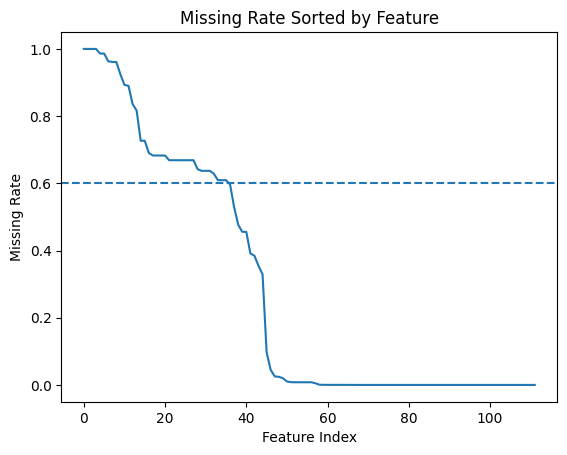

In [52]:
missing_data = (
    pd.DataFrame(data.isnull().mean())
    .reset_index()
    .rename(columns={"index": "feature", 0: "missing_rate"})
    .sort_values("missing_rate", ascending=False)
)

plt.figure()
plt.plot(missing_data["missing_rate"].values)
plt.axhline(0.6, linestyle="--")
plt.title("Missing Rate Sorted by Feature")
plt.ylabel("Missing Rate")
plt.xlabel("Feature Index")
plt.show()

### Borrowers Profile Features

In [ ]:
FEATURE_SECTIONS = {
    "Profile": [
        "Age", "Gender", "Education", "MaritalStatus", "NrOfDependants",
        "LanguageCode", "HomeOwnershipType"
    ],

    "Income": [
        "IncomeTotal", "IncomeFromPrincipalEmployer", "IncomeFromPension",
        "IncomeFromFamilyAllowance", "IncomeFromOther", "FreeCash"
    ],

    "Debt": [
        "DebtToIncome", "LiabilitiesTotal", "ExistingLiabilities", "RefinanceLiabilities"
    ],

    "CreditHistory": [
        "NoOfPreviousLoansBeforeLoan", "AmountOfPreviousLoansBeforeLoan",
        "PreviousRepaymentsBeforeLoan", "PreviousEarlyRepaymentsCountBeforeLoan",
        "NewCreditCustomer"
    ],

    "LoanTerms": [
        "Amount", "AppliedAmount", "LoanDuration", "MonthlyPayment", "Interest"
    ],

    "CreditScores": [
        "CreditScoreEeMini", "CreditScoreEsEquifaxRisk",
        "CreditScoreEsMicroL", "CreditScoreFiAsiakasTietoRiskGrade", "Rating"
    ]
}

In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

sns.set(style="whitegrid")

In [121]:
def plot_numeric_distributions(df, features, section_name):
    features = [f for f in features if f in df.columns]
    if not features:
        return

    cols = 3
    rows = math.ceil(len(features) / cols)

    plt.figure(figsize=(cols * 5, rows * 4))
    plt.suptitle(f"{section_name} — Distributions", fontsize=16)

    for i, feature in enumerate(features, 1):
        plt.subplot(rows, cols, i)
        sns.histplot(df[feature], bins=40, kde=True)
        plt.title(feature)

    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

In [122]:
def plot_numeric_boxplots(df, features, section_name):
    features = [f for f in features if f in df.columns]
    if not features:
        return

    cols = 3
    rows = math.ceil(len(features) / cols)

    plt.figure(figsize=(cols * 5, rows * 4))
    plt.suptitle(f"{section_name} — Boxplots", fontsize=16)

    for i, feature in enumerate(features, 1):
        plt.subplot(rows, cols, i)
        sns.boxplot(x=df[feature], orient="h")
        plt.title(feature)

    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

In [123]:
def plot_categorical_vs_target(df, features, target, section_name, top_n=12):
    features = [f for f in features if f in df.columns]

    for feature in features:
        ct = pd.crosstab(df[feature], df[target], normalize="index")
        ct = ct.sort_values(by=1, ascending=False)

        # Reduce clutter if too many categories
        if len(ct) > top_n:
            ct = ct.head(top_n)

        ct.plot(kind="bar", stacked=True, figsize=(7, 4), colormap="coolwarm")
        plt.title(f"{section_name}: {feature} vs PD-12")
        plt.ylabel("Proportion")
        plt.xlabel(feature)
        plt.legend(title="Default")
        plt.tight_layout()
        plt.show()

In [124]:
def run_section_eda_seaborn(df, section_map, target):
    num_cols = set(df.select_dtypes(include=np.number).columns)

    for section, features in section_map.items():
        print(f"\n===== {section.upper()} =====")
        
        numeric = [f for f in features if f in num_cols]
        categorical = [f for f in features if f not in num_cols]

        if numeric:
            plot_numeric_distributions(df, numeric, section)
            plot_numeric_boxplots(df, numeric, section)

        if categorical:
            plot_categorical_vs_target(df, categorical, target, section)



===== PROFILE =====


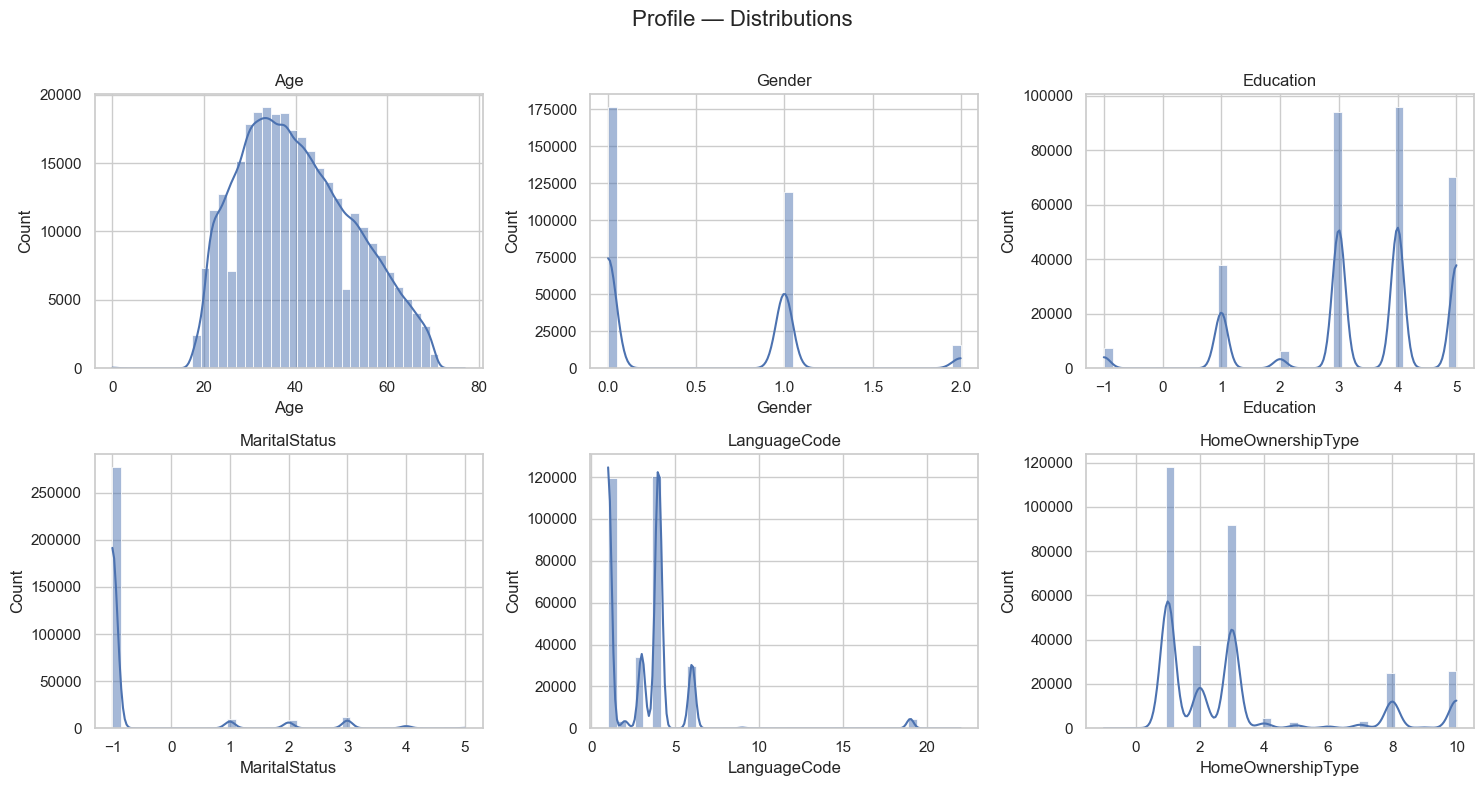

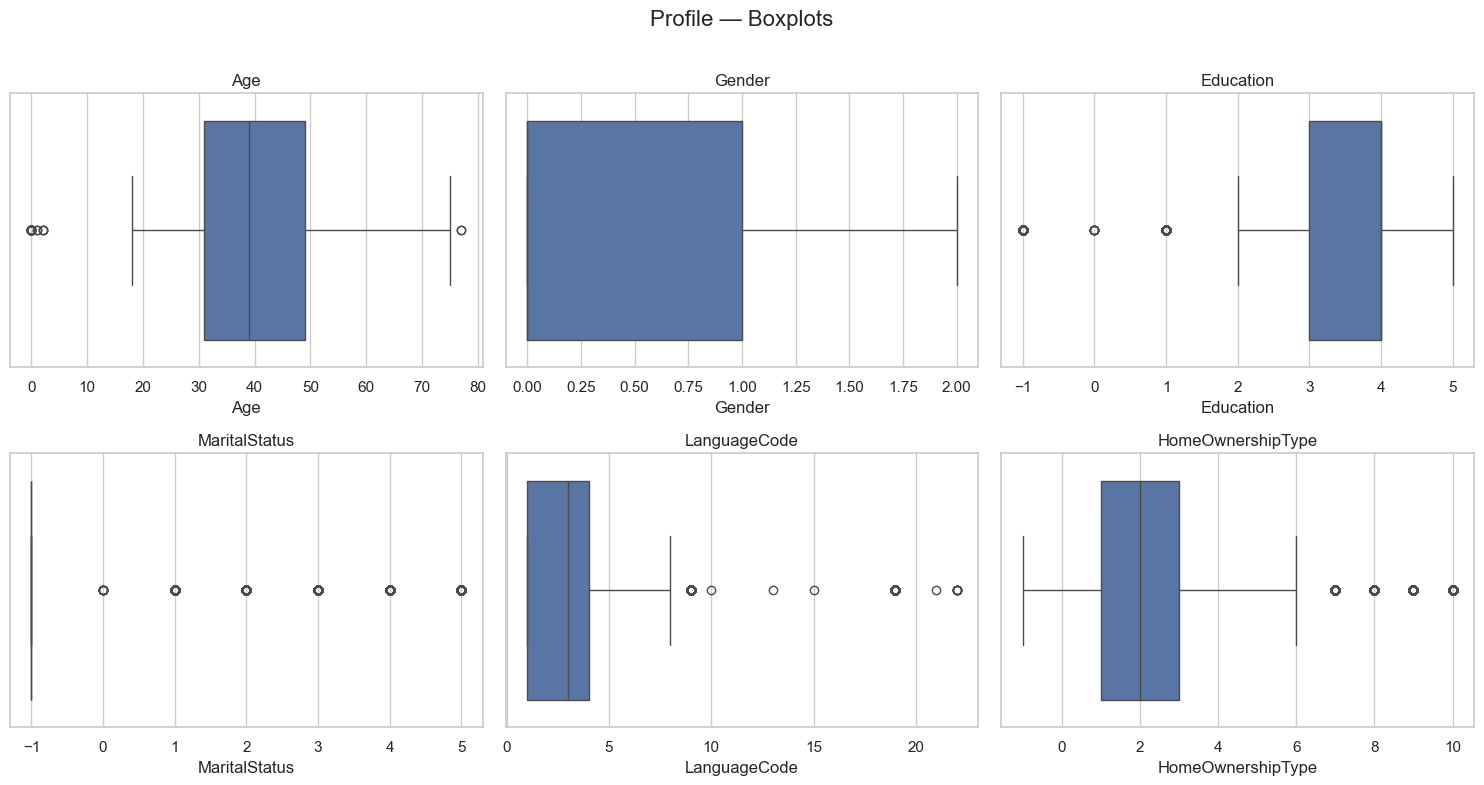

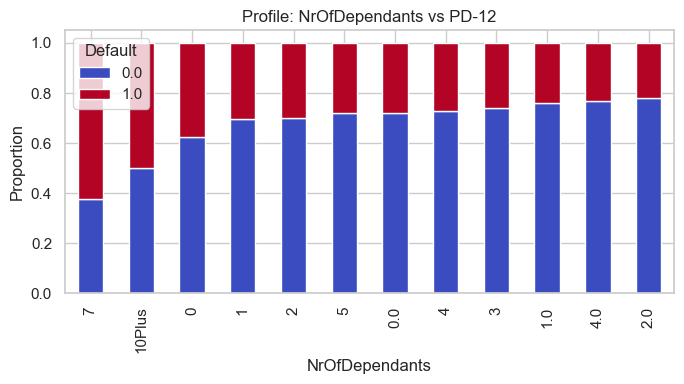


===== INCOME =====


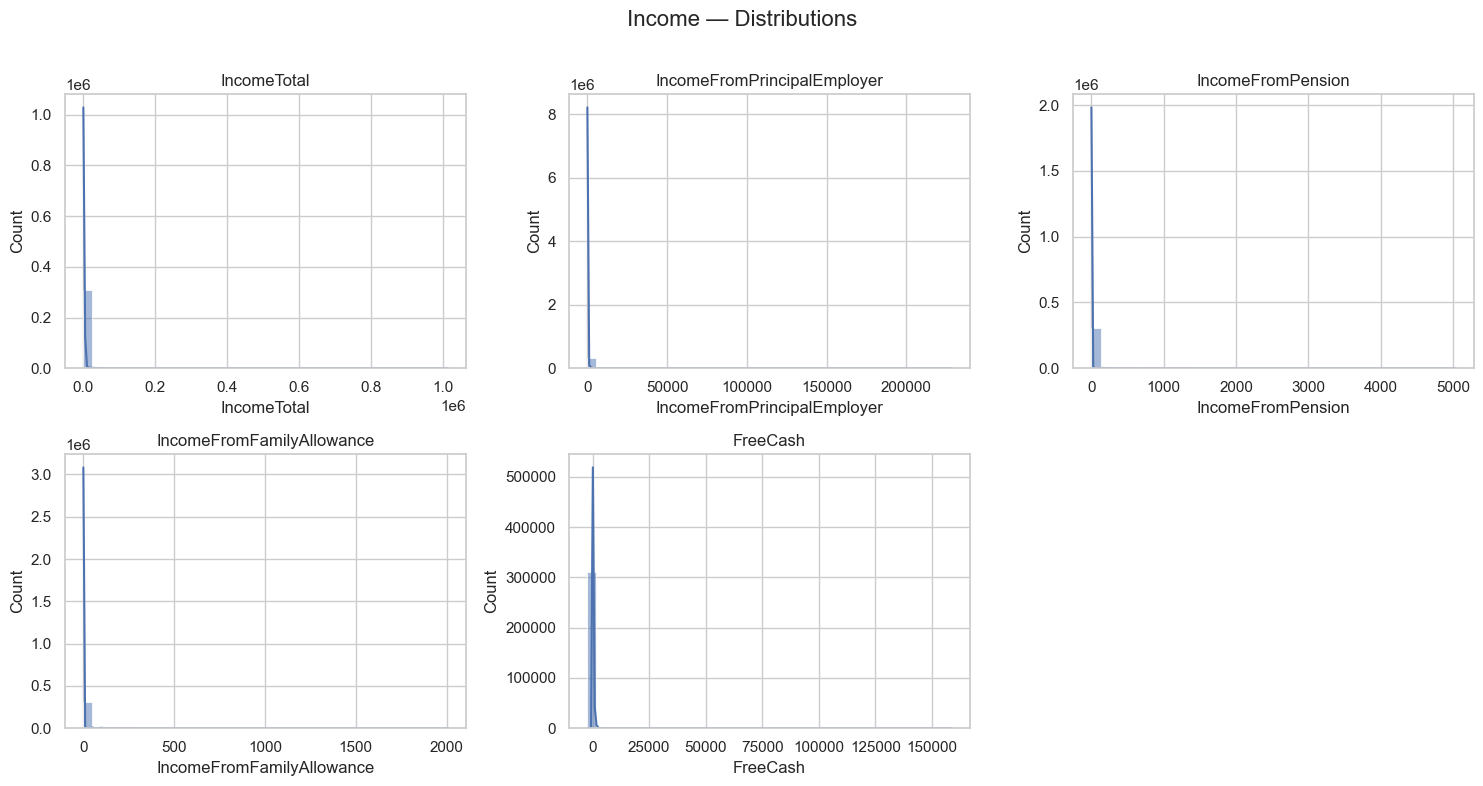

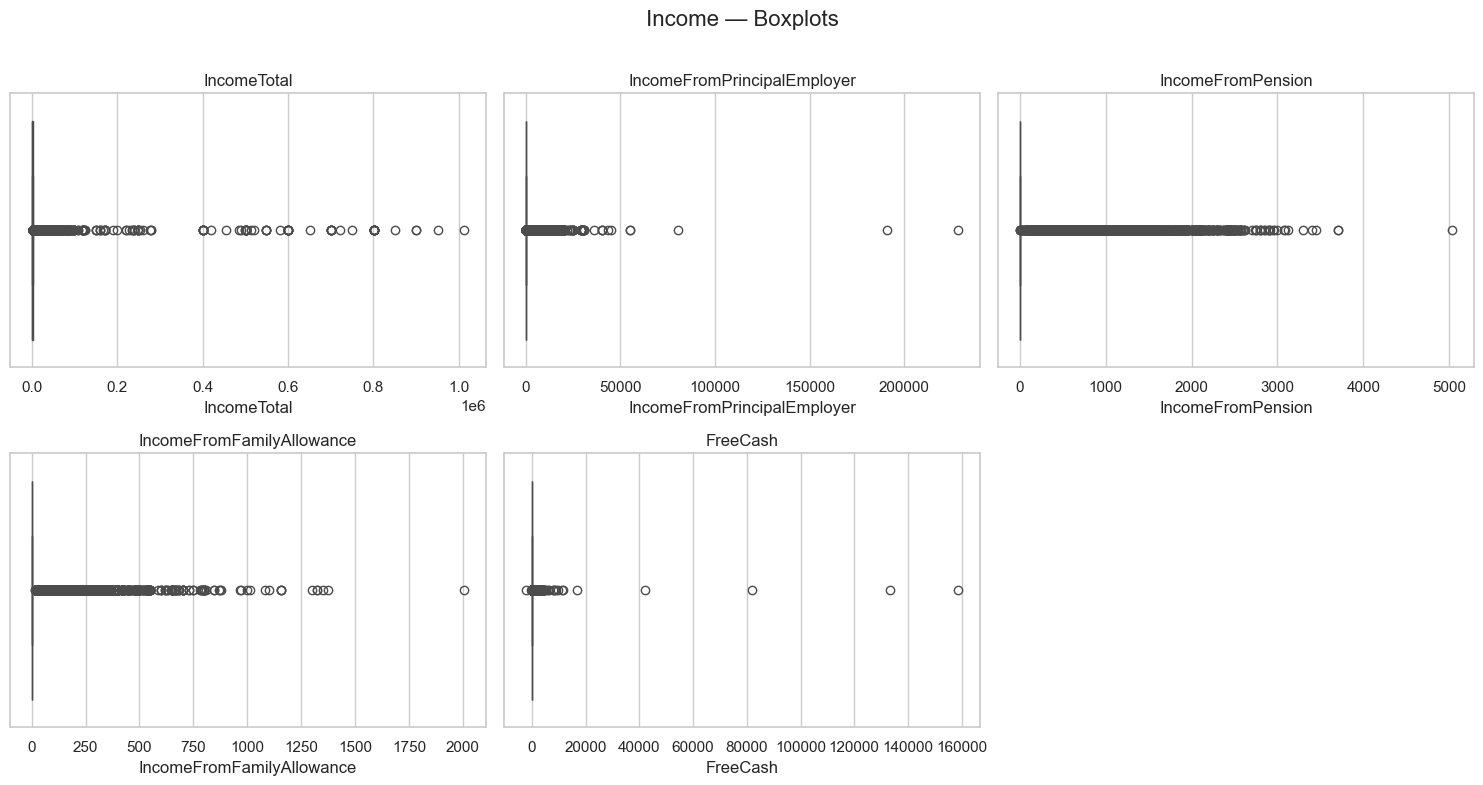


===== DEBT =====


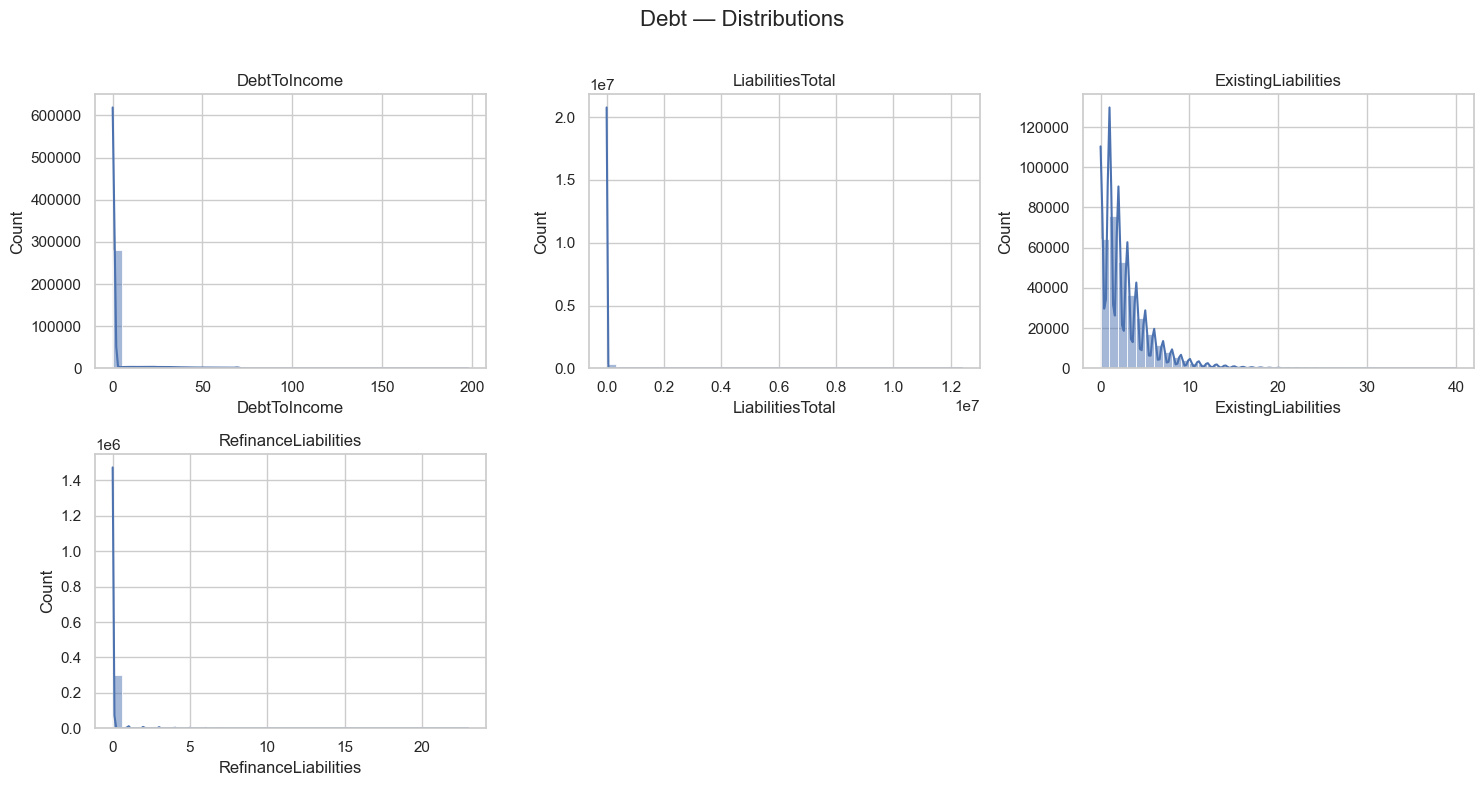

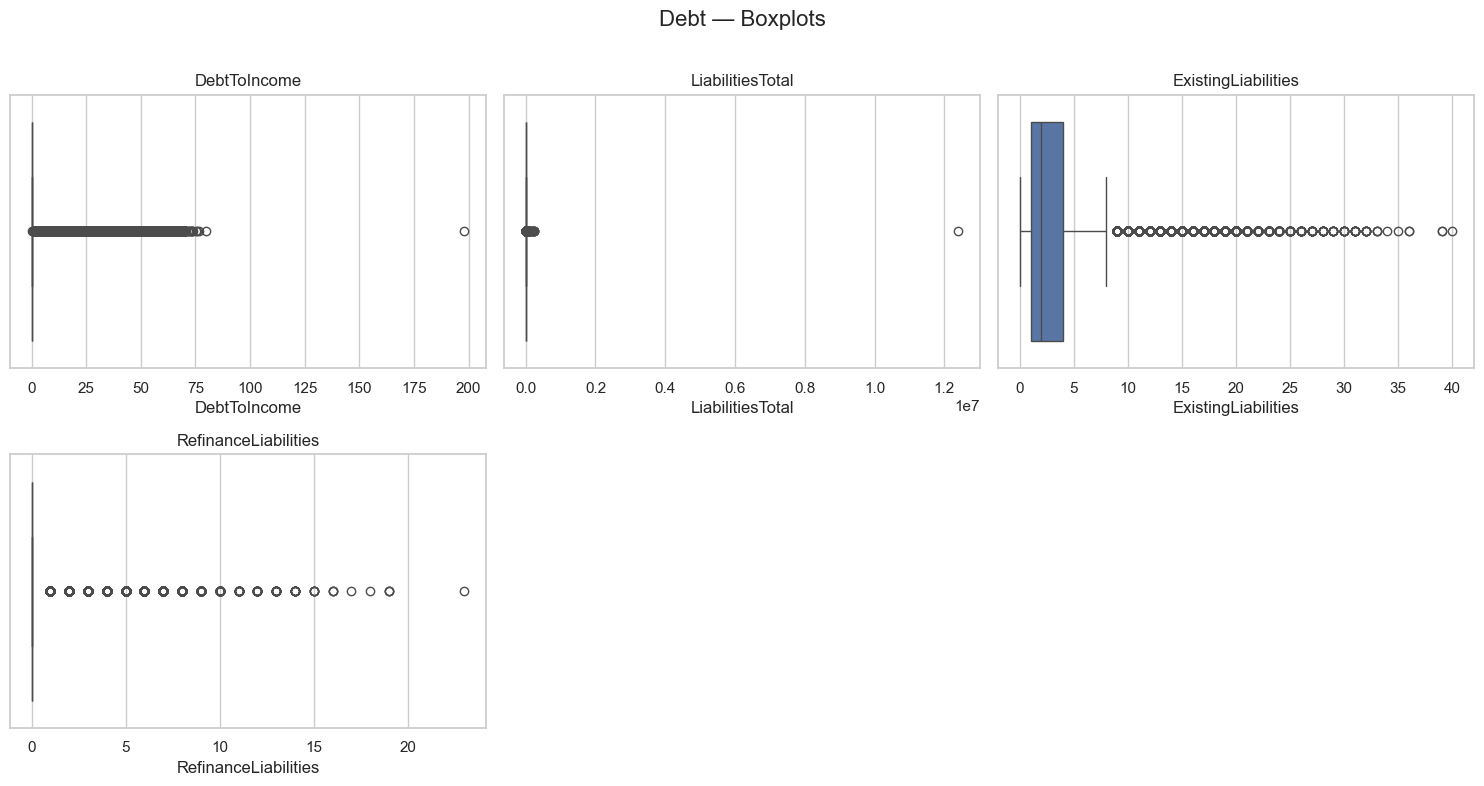


===== CREDITHISTORY =====


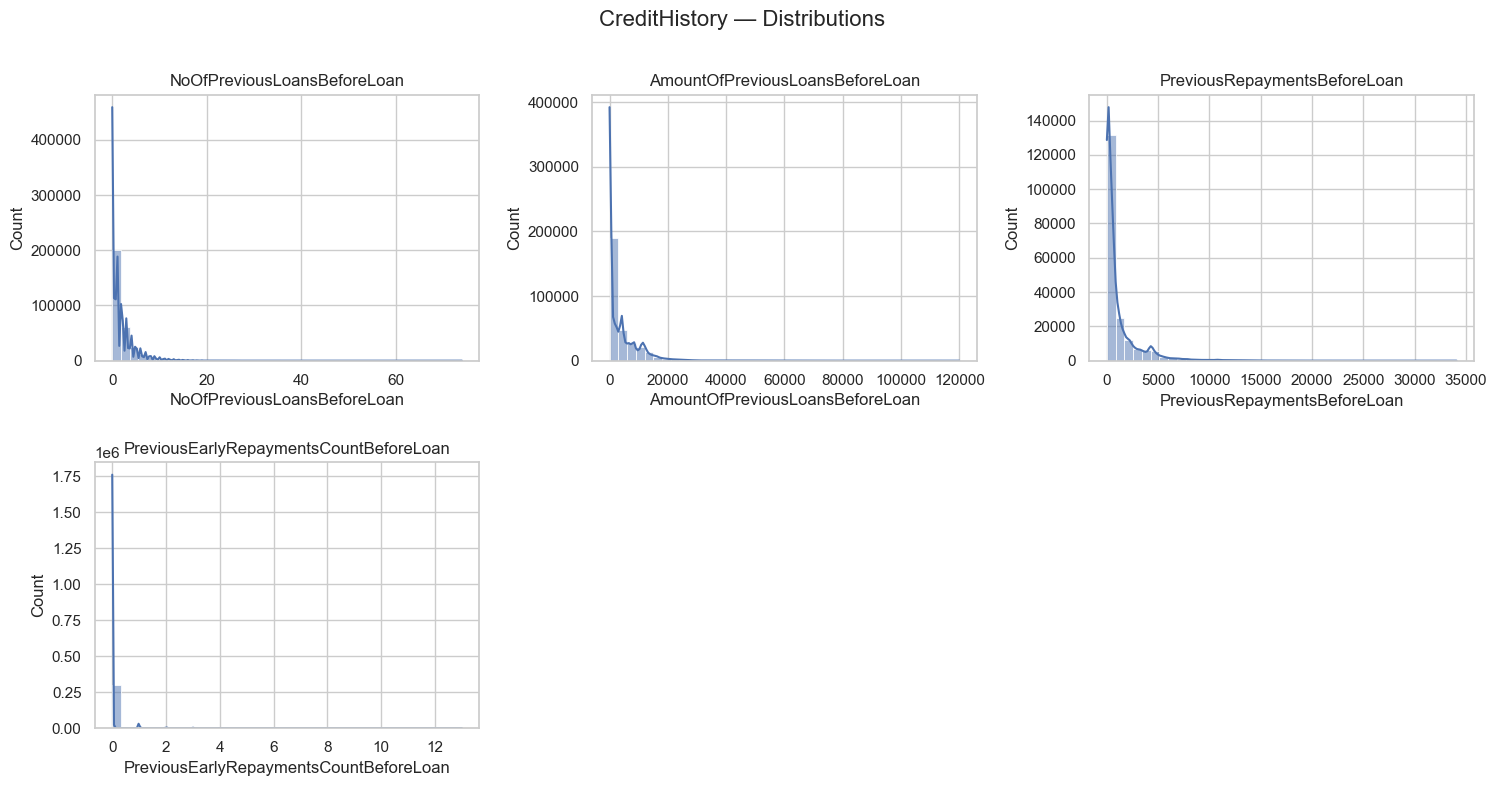

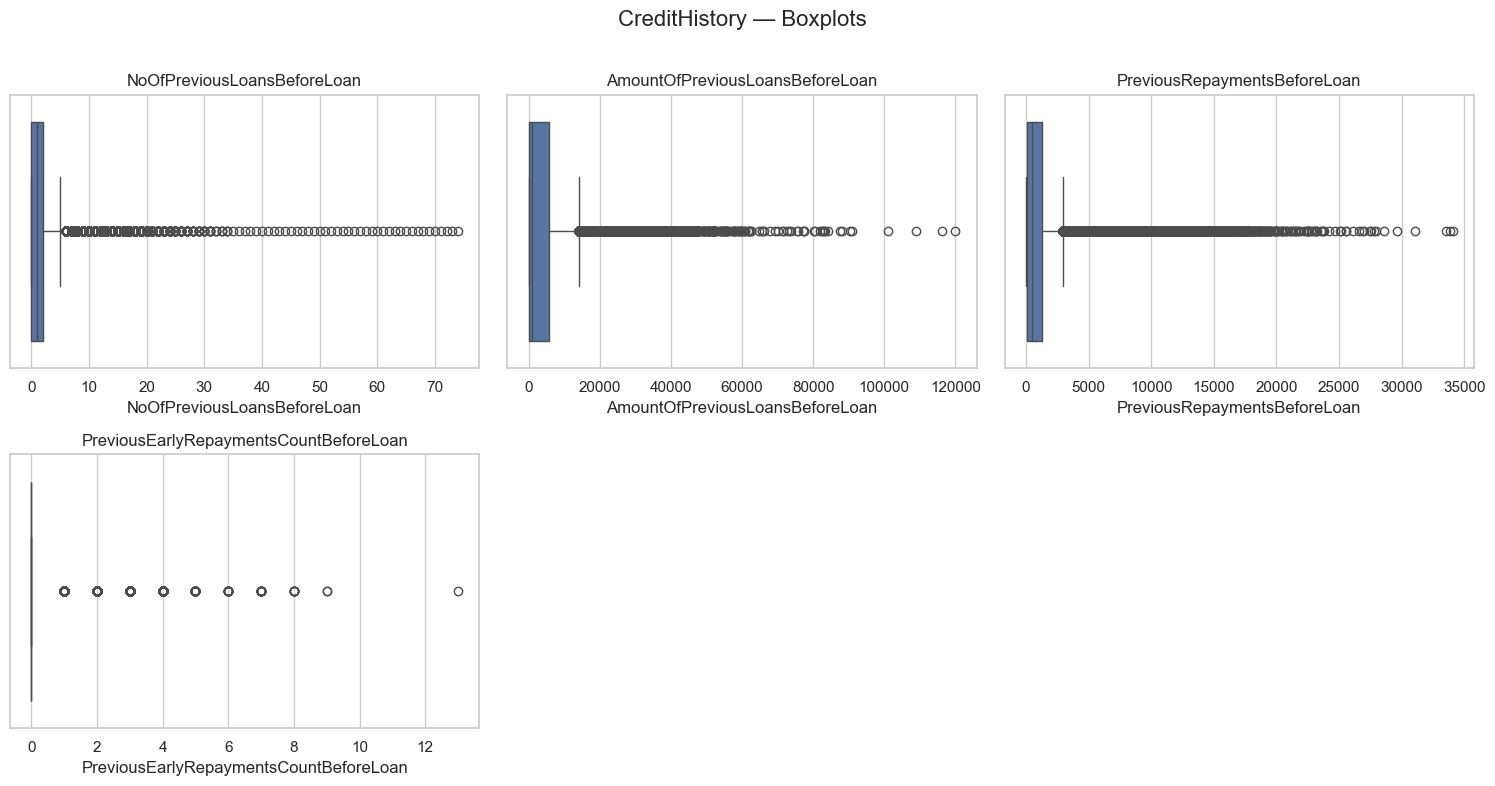

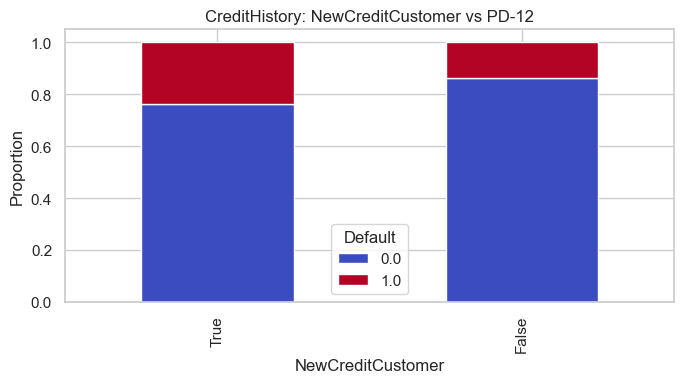


===== LOANTERMS =====


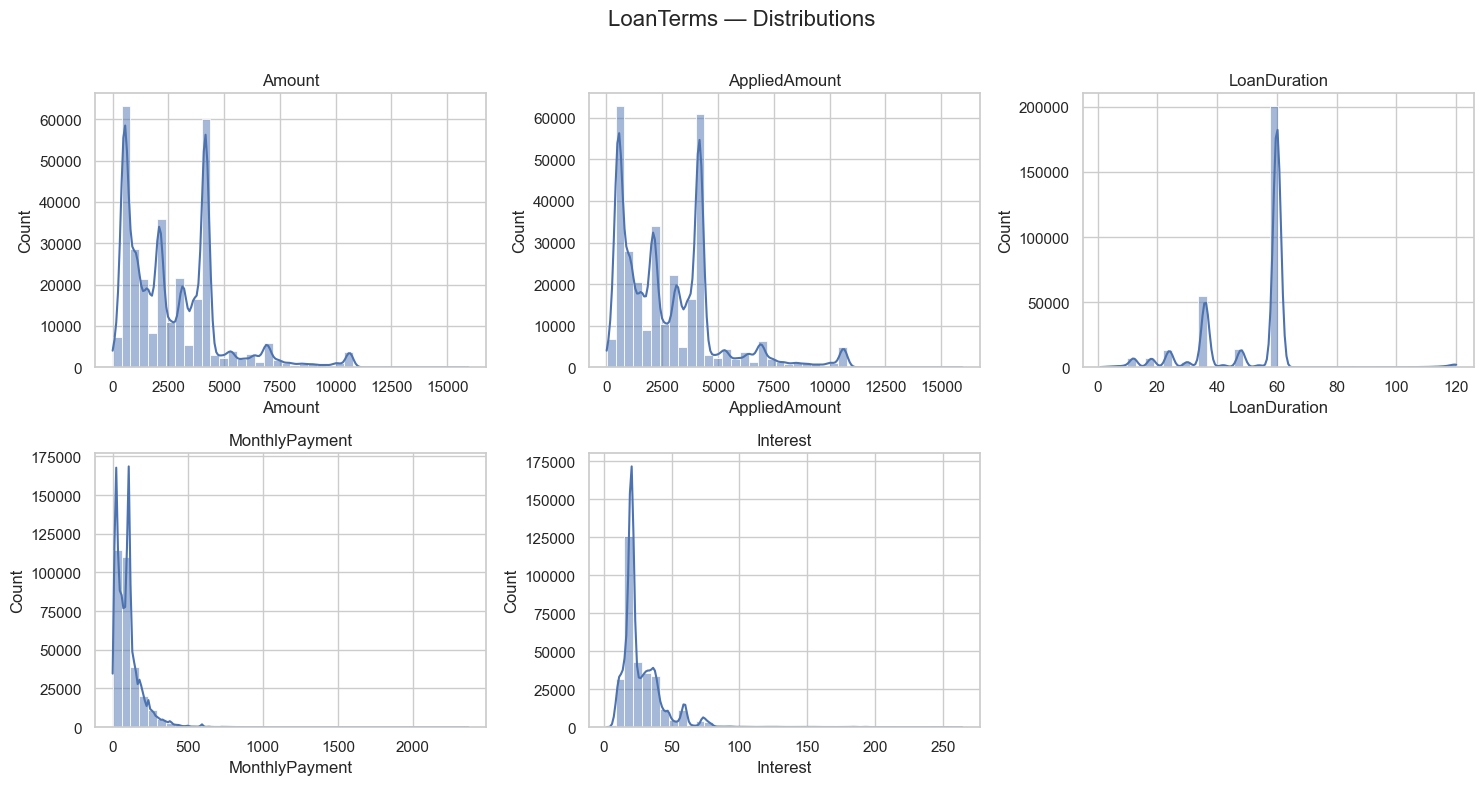

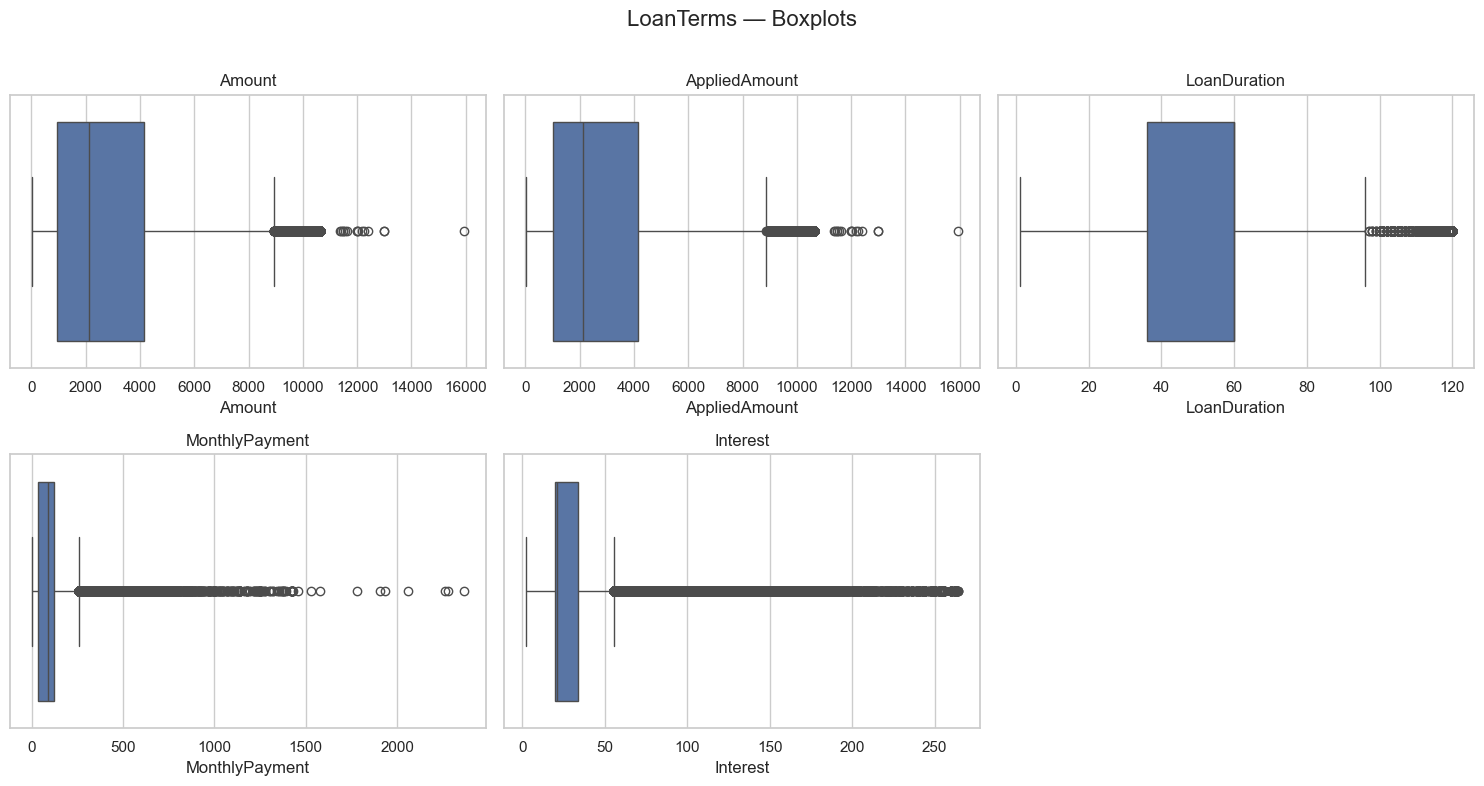


===== CREDITSCORES =====


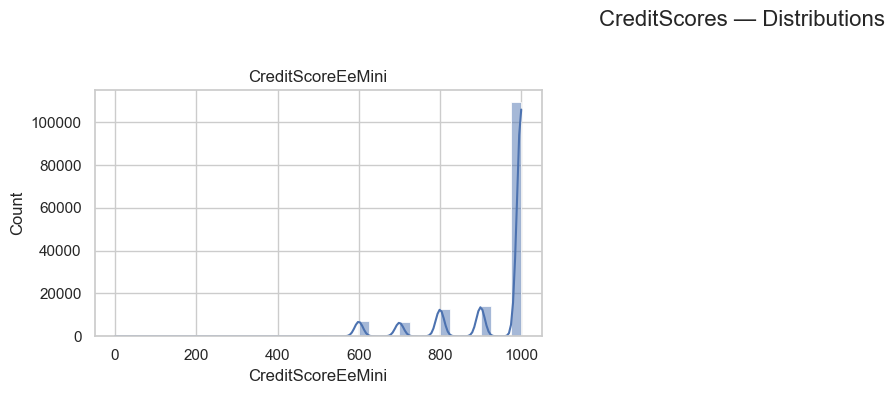

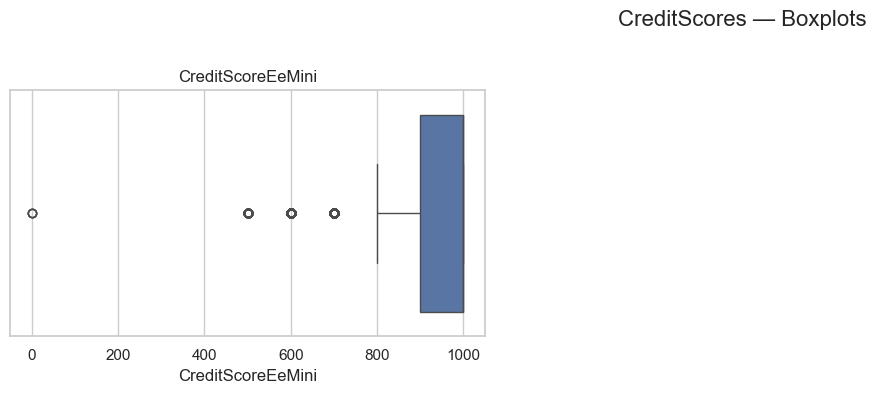

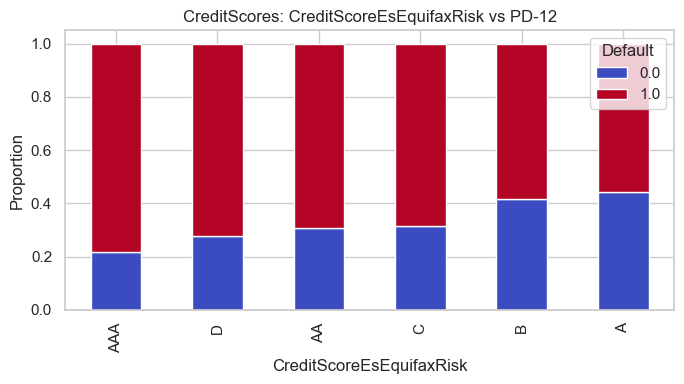

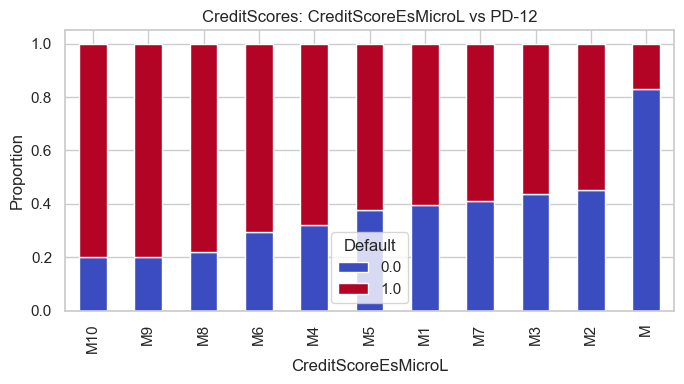

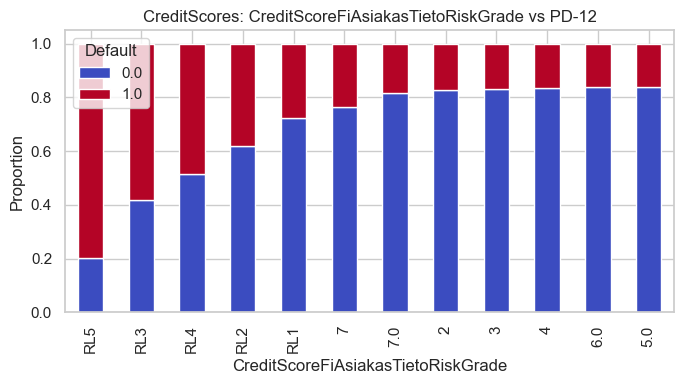

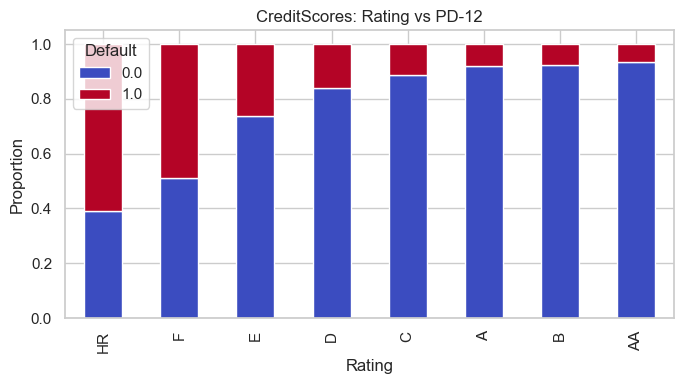

In [132]:
run_section_eda_seaborn(data, FEATURE_SECTIONS, target="DefaultTarget_12m")

### Observations from the data

 - Age seems to have some outliers and near zero values
 - The mahority of marital status is undefined
 - LanguageCode has values that are not defined in the data dictionary
 - Higher NofDependents seems to have correlation with default target
 - All income distribution are higly skewed.
 - DebtToIncome and LiabilitiesTotal have extreme outliers/values. DebtTOIncome cannot be more than 100%
 - Interest Rates more than 100 are not possible.
 - NofDependants have string and numeric values. Seems that the low and high values have correlation with the outcome but high missing values

## We assume that some rows need to be removed due to data issues.
 - Need to understand the % of row removal after the cleaning
 - Some outliers needs to be presserved and applpy cap and log transformation.

In [172]:
clean_data = (
    data
    .query("Interest < 100")
    .query("LiabilitiesTotal < 250000")
    .query("DebtToIncome < 100")
    .query("Age >= 18")
)
clean_data.shape

(308707, 75)

In [190]:
data[data["PreviousEarlyRepaymentsCountBeforeLoan"].isnull()].head(1)

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,PartyId,NewCreditCustomer,...,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
6694,2023-10-15,85383536-1EEF-4DD5-9A59-A0E500BC9530,11523,2012-10-09 11:26:36,2012-10-09 11:26:36,0,0.0,5005.0,{4DB5106D-34E6-40ED-ABAC-9DEF00F8ABB9},False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN


In [203]:
data["Rating"].value_counts()

Rating
C     103184
D      75685
B      42977
E      42819
F      27909
HR     14837
A      13481
AA      9086
Name: count, dtype: int64

In [214]:
data[data["IncomeTotal"] == 0][["IncomeTotal", "IncomeFromPrincipalEmployer", "IncomeFromPension", "IncomeFromFamilyAllowance", "IncomeFromSocialWelfare", "IncomeFromLeavePay", "IncomeFromChildSupport", "IncomeOther"]]

,IncomeTotal,IncomeFromPrincipalEmployer,IncomeFromPension,IncomeFromFamilyAllowance,IncomeFromSocialWelfare,IncomeFromLeavePay,IncomeFromChildSupport,IncomeOther
21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
332655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
332662,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
332663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
332664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [215]:
df1 = (
    data
    .assign(LoanToIncomeRatio = lambda df_: np.where(
        df_["IncomeTotal"] == 0, 
        0, 
        df_["Amount"] / df_["IncomeTotal"]
    ))
    .assign(PaymentToIncomeRatio = lambda df_: np.where(
        df_["IncomeTotal"] == 0, 
        0, 
        df_["MonthlyPayment"] / df_["IncomeTotal"]
    ))
    .assign(Dti = lambda df_: np.where(
        df_["IncomeTotal"] == 0, 
        0, 
        df_["LiabilitiesTotal"] / df_["IncomeTotal"]
    ))
)

In [236]:
data["Rating"].value_counts()

Rating
C     103184
D      75685
B      42977
E      42819
F      27909
HR     14837
A      13481
AA      9086
Name: count, dtype: int64

In [217]:
df1[df1["PaymentToIncomeRatio"].isnull()][["MonthlyPayment", "IncomeTotal"]]

,MonthlyPayment,IncomeTotal
4049,NaN,15500.0
4050,NaN,4000.0
4051,NaN,9000.0
4052,NaN,6000.0
4053,NaN,10700.0
...,...,...
14581,NaN,1596.0
14582,NaN,1100.0
14586,NaN,664.0
14587,NaN,2252.0


In [237]:
features = pd.read_csv("../data/processed_data/loan_data_features.csv")

In [243]:
features.columns

Index(['LoanDuration', 'IncomeFromPrincipalEmployer', 'IncomeFromPension',
       'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare',
       'IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther',
       'IncomeTotal', 'ExistingLiabilities', 'LiabilitiesTotal', 'Amount',
       'Age', 'Interest', 'AmountOfPreviousLoansBeforeLoan',
       'PreviousEarlyRepaymentsCountBeforeLoan',
       'PreviousRepaymentsBeforeLoan', 'MonthlyPayment',
       'NoOfPreviousLoansBeforeLoan', 'LoanToIncomeRatio',
       'PaymentToIncomeRatio', 'Dti', 'number_income_streams',
       'new_customer_binary', 'CreditScoreEsMicroLEnc', 'RatingEnc',
       'EmploymentDurationCurrentEmployer_MoreThan5Years',
       'EmploymentDurationCurrentEmployer_Other',
       'EmploymentDurationCurrentEmployer_Retiree',
       'EmploymentDurationCurrentEmployer_TrialPeriod',
       'EmploymentDurationCurrentEmployer_UpTo1Year',
       'EmploymentDurationCurrentEmployer_UpTo2Years',
       'EmploymentDurationCurrent

<Axes: xlabel='LiabilitiesTotal'>

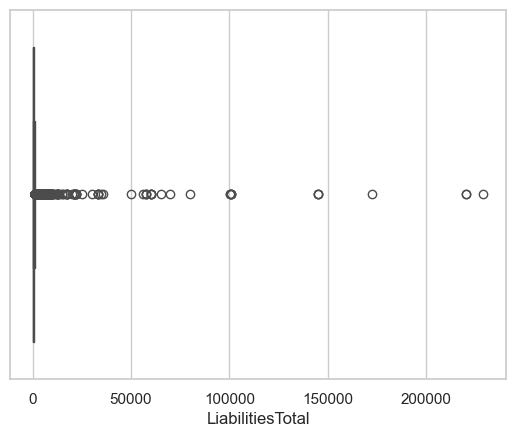

In [171]:
sns.boxplot(x=clean_data["LiabilitiesTotal"], orient="h")